In [1]:
# improt the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tabulate import tabulate


import warnings
warnings.filterwarnings('ignore')

### Task 1

## Data Understanding & Exploration

In [2]:
def explore_dataset(df, data_filename=None):
    """
    In explore_dataset function we are doing all the things that given below:
    - checking shape of dataset
    - checking column names that exist in dataset
    - checking null values 
    - checking overall information about dataset using info() method
    - checking dtypes of columns
    """
    print("="*100)
    print("\t\t\tEDA Dataset: {}".format(data_filename))
    print("="*100)
    
    print("Total Rows: {}".format(df.shape[0]))
    print("\nTotal Columns: {}".format(df.shape[1]))
    print("="*100)
    print("\nColumns: {}".format(df.columns.tolist()))
    print("="*100)
    print("\nTotal Null Values: {}".format(df.isnull().sum().sum()))
    print("\t\tOverall Null Values in Features\n")
    print(df.isnull().sum())
    print("="*100)
    print("Any Duplicated Values: {}".format(df.duplicated().any()))
    print("="*100)
    print("\t\tOverall Information about Dataset\n")
    print(df.info())
    print("="*100)
    print("\t\tDtype of all Columns\n")
    print(df.dtypes)
    print()

In [3]:
filename = 'pulsar_star_19721881.csv'
df = pd.read_csv(filename)

In [4]:
# lets check the information of traning dataset
explore_dataset(df,filename)

			EDA Dataset: pulsar_star_19721881.csv
Total Rows: 10000

Total Columns: 9

Columns: [' Mean of the integrated profile', ' Standard deviation of the integrated profile', ' Excess kurtosis of the integrated profile', ' Skewness of the integrated profile', ' Mean of the DM-SNR curve', ' Standard deviation of the DM-SNR curve', ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve', 'target_class']

Total Null Values: 2795
		Overall Null Values in Features

 Mean of the integrated profile                     0
 Standard deviation of the integrated profile       0
 Excess kurtosis of the integrated profile       1374
 Skewness of the integrated profile                 0
 Mean of the DM-SNR curve                           0
 Standard deviation of the DM-SNR curve           927
 Excess kurtosis of the DM-SNR curve                0
 Skewness of the DM-SNR curve                     494
target_class                                        0
dtype: int64
Any Duplicated Values: 

* From above analysis, we can see that we have total rows `10000` and columns `9`.
* Null values also exist in dataset.
* Duplicated values not inside in dataset.
* In our dataset, all features is in numeric format. we can see the dtypes `(float64)`.

In [5]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,118.617188,45.538638,0.442852,0.158532,1.632943,11.843173,12.449990,209.923514,0.0
1,123.820312,52.356267,0.072768,-0.372553,3.668060,20.547873,7.584865,66.580520,0.0
2,113.367188,43.476263,0.291051,0.284135,2.099498,18.705363,10.134921,109.222589,0.0
3,123.210938,51.078012,0.179377,-0.177285,2.107023,16.921773,10.080333,112.558591,0.0
4,116.414062,51.141887,0.059016,-0.011105,1.195652,12.132498,13.367747,217.725941,0.0


In [6]:
# lets change the column names , we can see in dataset
# long column names with space
df.columns = ['mean_profile', 'std_profile', 'kurtosis_profile', 'skewness_profile', 'mean_dmsnr',
               'std_dmsnr', 'kurtosis_dmsnr', 'skewness_dmsnr', 'target']

In [7]:
df.head()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr,target
0,118.617188,45.538638,0.442852,0.158532,1.632943,11.843173,12.449990,209.923514,0.0
1,123.820312,52.356267,0.072768,-0.372553,3.668060,20.547873,7.584865,66.580520,0.0
2,113.367188,43.476263,0.291051,0.284135,2.099498,18.705363,10.134921,109.222589,0.0
3,123.210938,51.078012,0.179377,-0.177285,2.107023,16.921773,10.080333,112.558591,0.0
4,116.414062,51.141887,0.059016,-0.011105,1.195652,12.132498,13.367747,217.725941,0.0


## Data Cleaning & Analysis

In [8]:
# lets try to check the desctiption of dataset
desc = df.describe().T
print(tabulate(desc, headers = 'keys', tablefmt = 'psql'))

+------------------+---------+------------+------------+-----------+-------------+------------+------------+------------+
|                  |   count |       mean |        std |       min |         25% |        50% |        75% |        max |
|------------------+---------+------------+------------+-----------+-------------+------------+------------+------------|
| mean_profile     |   10000 | 111.14     |  25.5605   |  5.8125   | 100.889     | 115.23     | 127.238    |  185.258   |
| std_profile      |   10000 |  46.5173   |   6.73639  | 24.772    |  42.4167    |  46.9342   |  50.9277   |   91.2065  |
| kurtosis_profile |    8626 |   0.478394 |   1.06302  | -1.73802  |   0.0237132 |   0.223437 |   0.47331  |    8.06952 |
| skewness_profile |   10000 |   1.74952  |   6.10769  | -1.79189  |  -0.186198  |   0.20187  |   0.923714 |   68.1016  |
| mean_dmsnr       |   10000 |  12.6561   |  29.5694   |  0.213211 |   1.9214    |   2.8056   |   5.49791  |  222.421   |
| std_dmsnr        |    

* Just by looking at this table we can extract some important information of our data, for example if we take a look at the target column we can see the max value is 1 (pulse star) and the minimum value is 0 (not a star) while the mean of this column tends to 0, which lets us know there are more "false pulse stars" than actual stars. 
* Additionally we clearly see this data needs some scaling since the difference between values is noticeable.
* From above, we can see that mean_profile feature max value is 185 and kurtosis_profile is 8. So, we need to scale the features also.

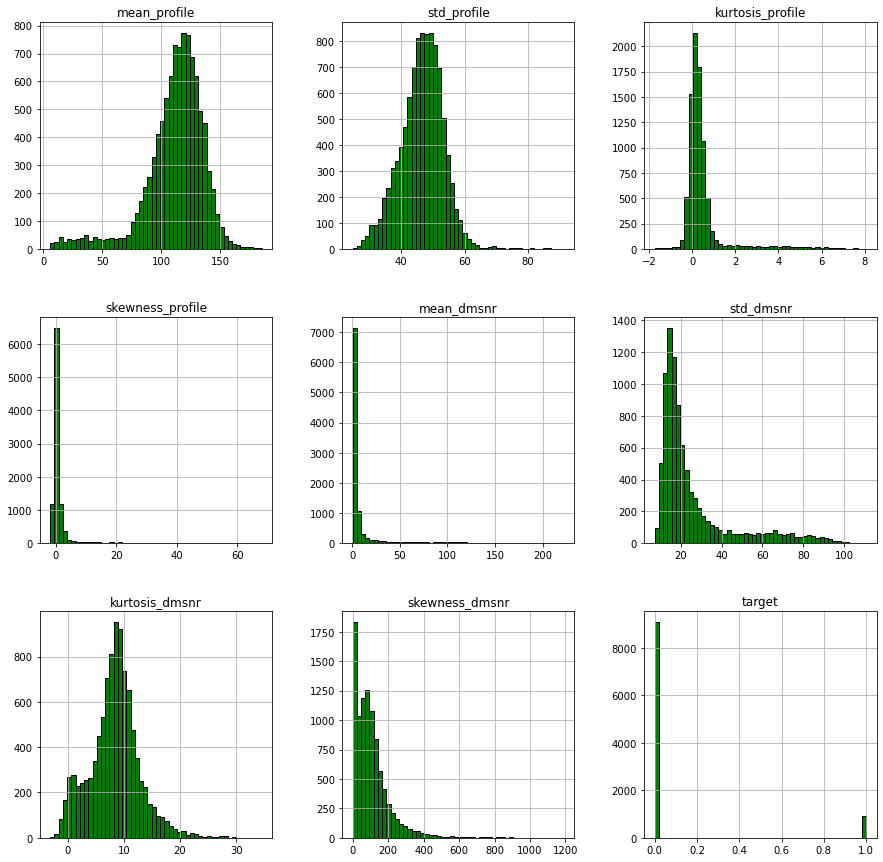

In [9]:
# Overall idea about distribution of data histogram 
def plot_histogram(data):
    data.select_dtypes(include=[int, float]).hist(bins=50, figsize=(15,15), color = "g", edgecolor='black')
    plt.show()
    
plot_histogram(df)

* From above analysis, we can see the histogram of each feature in which some features are normally distributed and some are right skewed.
* mean and std profile feature are normally distributed form.
* std_dmsnr and skerwnes_dmsnr are right skewed.


		Overal Distribution of target

   target  count
0     0.0   9085
1     1.0    915


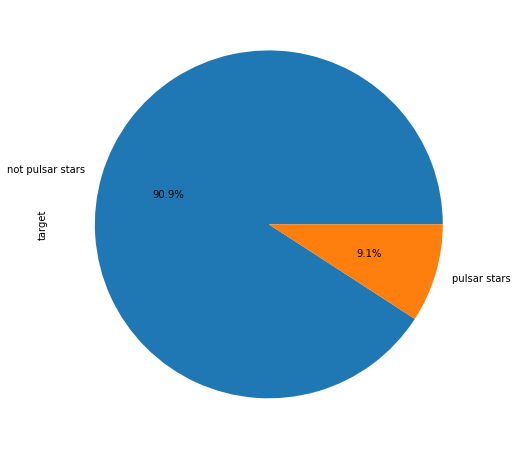

In [10]:
print("\n\t\tOveral Distribution of target\n")
print(df['target'].value_counts().to_frame().reset_index().rename(
    columns={'index':'target','target':'count'}))
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(15,8),labels=["not pulsar stars","pulsar stars"])
plt.show()

* From above pie chart, we can see the distribution of each target in dataset.
* Total 915 values inside the dataset are pulsar stars and reset are not a pulsar stars.
* From above we can clearly see our target feature is highly imbalanced form.
* From the graph above we see that approximately the 9% of our samples are real Pulsar Stars while the other 91% detected signals are not pulsar stars.

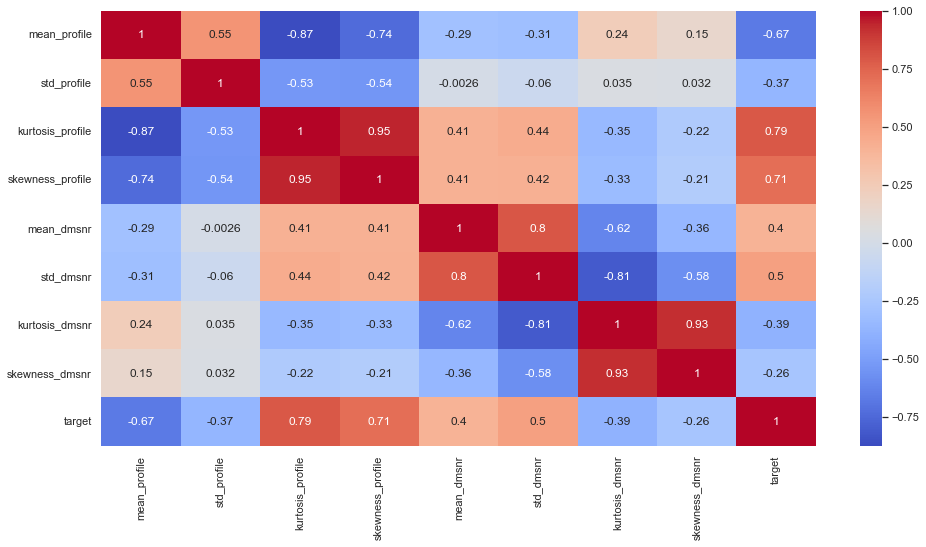

+----+------------------+-------------------------+
|    | feature          |   CorrelationWithTarget |
|----+------------------+-------------------------|
|  0 | kurtosis_profile |                0.793428 |
|  1 | skewness_profile |                0.707409 |
|  2 | std_dmsnr        |                0.495139 |
|  3 | mean_dmsnr       |                0.400296 |
|  4 | skewness_dmsnr   |               -0.260722 |
|  5 | std_profile      |               -0.367005 |
|  6 | kurtosis_dmsnr   |               -0.39028  |
|  7 | mean_profile     |               -0.674869 |
+----+------------------+-------------------------+


In [11]:
# lets try to check the correlation of each feature with target
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
plt.show()

PCC = df.corr()['target'].values
dic = {
    'feature' : df.corr()['target'].index,
    'CorrelationWithTarget' : PCC
}
pcc_df = pd.DataFrame(dic).sort_values(by = 'CorrelationWithTarget',ascending=False)[1:].reset_index()
pcc_df = pcc_df.drop('index', axis=1)
print(tabulate(pcc_df, headers = 'keys', tablefmt = 'psql'))

* From above table and graph , we can see from this correlation matrix is that four of the eight features we have in our dataset correlate positively with our target variable whilst the other four correlate negatively; this is really going to help when training our model since the separation between classes becomes clear.
* A positive correlation means that the variables move in the same direction. Put another way, it means that as one variable increases so does the other, and conversely, when one variable decreases so does the other. A negative correlation means that the variables move in opposite directions.

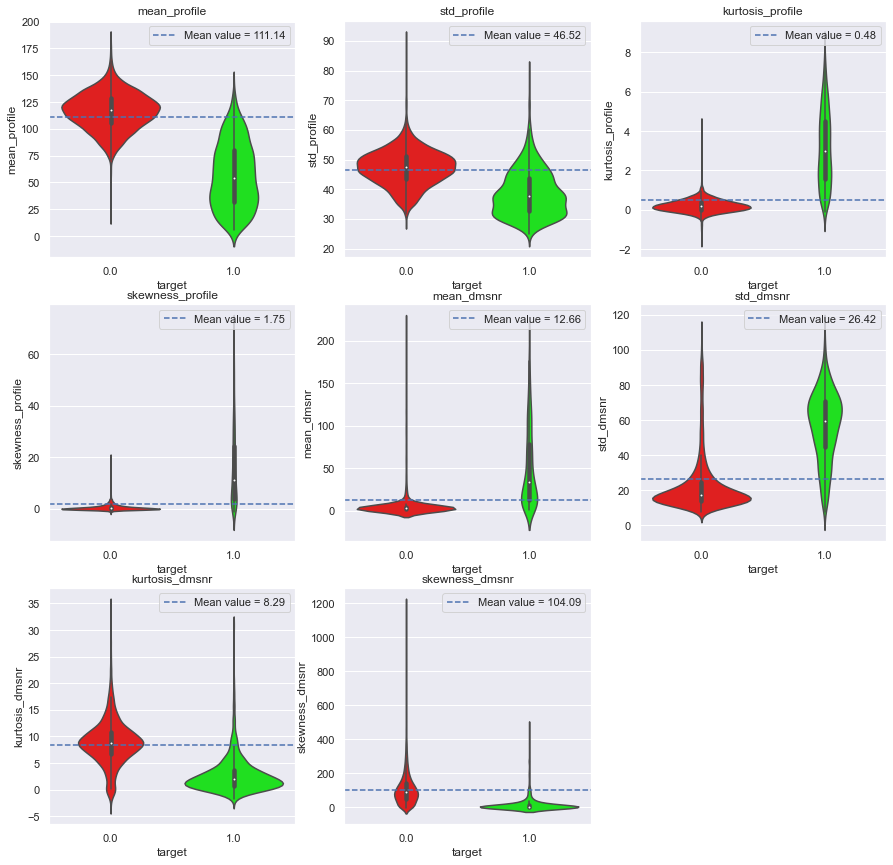

In [12]:
#violinlpot of all features
features = df.iloc[:,0:8]
plt.figure(figsize=(15,20))
j = 0
for i in features:
    plt.subplot(4,3,j+1)
    sns.violinplot(x=df["target"],y=df[i],palette=["red","lime"])
    plt.title(i)
    plt.axhline(df[i].mean(),linestyle = "dashed", label ="Mean value = " + str(round(df[i].mean(), 2)))
    plt.legend(loc="best")
    j = j + 1

**mean_profile.** From the correlation matrix we observed the higher the values the less change of the signal coming from a pulsar star, in our violinplot we clearly see it. Additionally, by looking at the mean we could say that if a mean_profile value is above the mean value, that signal might probably to come from another source than a star.

**kurtosis_profile.** Like mean profile, this feature is also pretty interesting. We clearly observe how the majority of samples whose kurtosis_profile value is above the mean value belong to the group of pulsar stars while, with some outliers that break the rules, lower values than the mean come from other signals. In addition, the distribution of values from the "non pulsar" group is pretty similar, meaning the range of kurtosis_profile values for those signals is quite narrow and the opposite happens to the pulsar group, values tend to be in a range between 0.48-8.

**skewness_profile.** From skewness_profile we can extract a quite interesting information. It actually seems weird the mean value is just 1.77 when we have values higher than 60 in our dataset. The reason for that is that in our dataset we have approximately 10 times more "non-pulsar" than actual pulsar stars and the majority of skewness values for the non pulsar are pretty close to 0; since the pulsar group is proportionally smaller the mean value is penalized. However that gives us a very important information, the majority of samples whoso skewness_profile value is higher than the mean will probably belong to the pulsar group and, we could say almost 100% samples whose value is higher than 23~ are stars!

**mean_dmsnr/skewness_dmsnr**. These features are pretty similar in terms of data distribution with the difference being that in mean_dmsn the vast majority of negative star values lay under the mean and in skewness_dmsnr it's exactly the oppositve, pulsar stars are located under the mean value. That said, these distributions look very similar to the one we commented before (skewness_profile) but with one exception: here we can't surely affirm that from "x" value above or below the mean value each sample will belong to a pulsar or not pulsar star, since the range of values for these features is pretty wide.

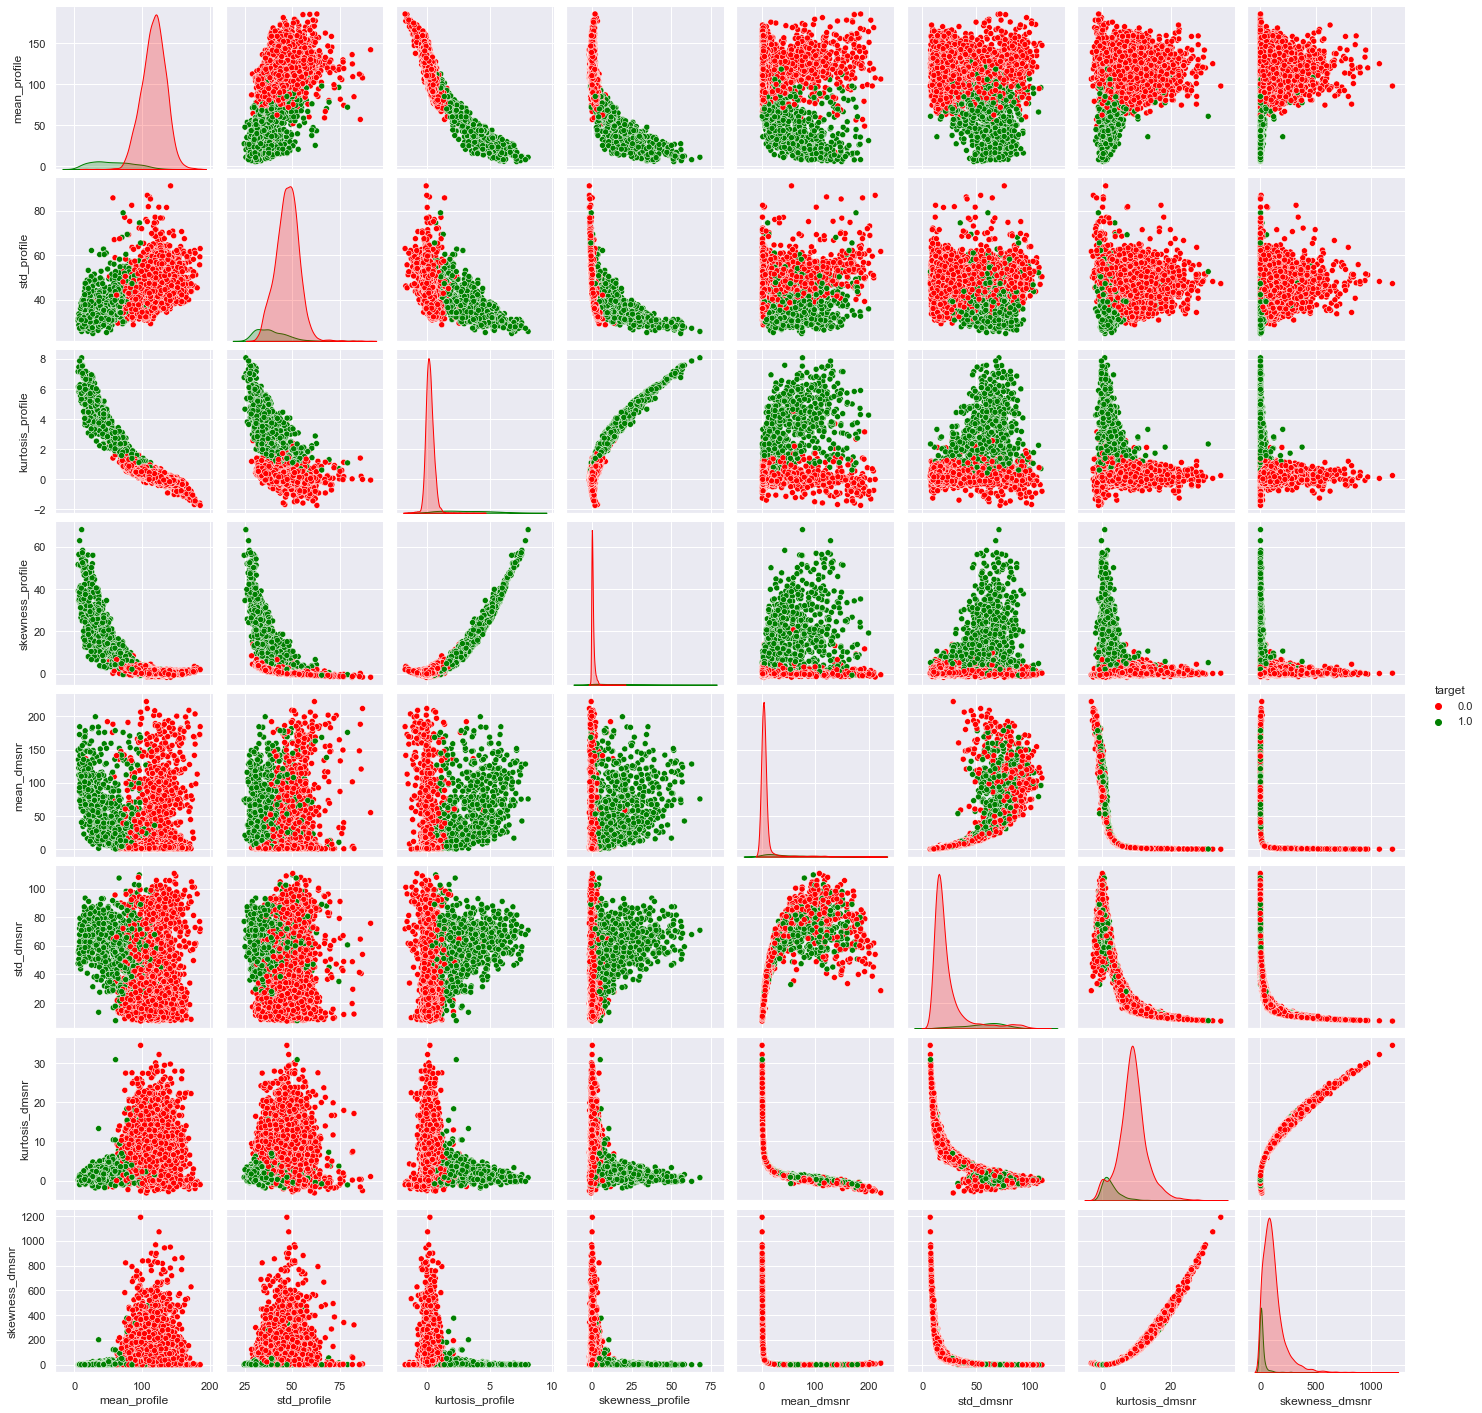

In [13]:
# lets plot the pairplot between features
sns.pairplot(df, hue="target", palette=["red","green"])
plt.show()

* From the above graph, we can observe the variations in each plot. The plots are in matrix format where the row name represents x axis and column name represents the y axis. 
* The main-diagonal subplots are the univariate histograms (distributions) for each attribute.
* Pair plot is used to understand the best set of features to explain a relationship between two variables
* So, we can observe the postive and negative correation of features with target.

In [14]:
# lets try to again check the null values and handle the missing values
df.isnull().sum()

mean_profile           0
std_profile            0
kurtosis_profile    1374
skewness_profile       0
mean_dmsnr             0
std_dmsnr            927
kurtosis_dmsnr         0
skewness_dmsnr       494
target                 0
dtype: int64

In [15]:
# missing feature is in numeric format so, we will fill
# the missing values with mean/Average
df = df.fillna(df.mean())

In [16]:
# lets again check the null values 
df.isnull().sum()

mean_profile        0
std_profile         0
kurtosis_profile    0
skewness_profile    0
mean_dmsnr          0
std_dmsnr           0
kurtosis_dmsnr      0
skewness_dmsnr      0
target              0
dtype: int64

* From above, we can see that no null values exist in dataset. Great!

### Task 2

* Standardisation is more robust to outliers, and in many cases, it is preferable over Max-Min Normalisation.
* Therefore, we will use the Standardisation techniques to scale the data.

In [17]:
# lets get the independent features and dependent feature
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [18]:
# independent features
X.head()

,mean_profile,std_profile,kurtosis_profile,skewness_profile,mean_dmsnr,std_dmsnr,kurtosis_dmsnr,skewness_dmsnr
0,118.617188,45.538638,0.442852,0.158532,1.632943,11.843173,12.449990,209.923514
1,123.820312,52.356267,0.072768,-0.372553,3.668060,20.547873,7.584865,66.580520
2,113.367188,43.476263,0.291051,0.284135,2.099498,18.705363,10.134921,109.222589
3,123.210938,51.078012,0.179377,-0.177285,2.107023,16.921773,10.080333,112.558591
4,116.414062,51.141887,0.059016,-0.011105,1.195652,12.132498,13.367747,217.725941


In [19]:
# dependent feature
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [20]:
# Feature scaling marks the end of the data preprocessing in Machine Learning.
# It is a method to standardize the independent variables of a dataset within a specific range.
# In other words, feature scaling limits the range of variables so that you can compare them on common grounds.
from sklearn.preprocessing import StandardScaler
std = StandardScaler()  
X = std.fit_transform(X) 

In [21]:
from sklearn.model_selection import train_test_split

# lets split the data into 80% validation and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# lets try to check the shape of training and testing
print("training shape :",X_train.shape)
print("testing shape :", X_test.shape)

training shape : (8000, 8)
testing shape : (2000, 8)


### Task 3

* We have already observed our target feature is highly imabalanced form, pproximately the 9% of our samples are real Pulsar Stars while the other 91% detected signals are not pulsar stars.
* Metrics like accuracy, precision, recall are good ways to evaluate classification models for `balanced datasets`, but if the data is `imbalanced` then other methods like ROC/AUC perform better in evaluating the model performance.
* ROC AUC and Precision-Recall AUC provide scores that summarize the curves and can be used to compare classifiers. ROC Curves and ROC AUC can be optimistic on severely imbalanced classification problems with few samples of the minority class.
* Precision and Recall are the two building blocks of the F1 score. The goal of the F1 score is to combine the precision and recall metrics into a single metric. At the same time, the F1 score has been designed to work well on imbalanced data.

### Task 4

In [22]:
import time

# Import classifiers
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate


# import methods for measuring accuracy, precision, recall etc
from sklearn.metrics import (
    accuracy_score, 
    precision_score,
    recall_score,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [23]:
# function for evaluation metrics precision, recall, f1 etc
def modelEvaluation(model, predictions,X_test, y_test_set):
    # Kfold cross validation
    kfold = KFold(n_splits=10)    
    
    y_score = model.predict_proba(X_test)
    fpr, tpr, th = roc_curve(y_test_set, y_score[:,1])
    roc_auc = auc(fpr, tpr)
    
    print ("ROC_AUC on validation set: {:.4f}".format(roc_auc))
    scores = cross_validate(model, X, y, cv=kfold, scoring='accuracy')
    
    print ("KFold Cross Validation on validation set: {:.4f}".format(scores['test_score'].mean()))
    
    print ("\nClassification report : \n", classification_report(y_test_set, predictions, 
                                                                 target_names=["not pulsar stars","pulsar stars"]))
    print ("\nConfusion Matrix : \n", confusion_matrix(y_test_set, predictions))
    sns.set(font_scale=1)
    cm = confusion_matrix(y_test_set, predictions)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    results = [accuracy_score(y_test_set, predictions),precision_score(y_test_set, predictions),
              recall_score(y_test_set, predictions),f1_score(y_test_set, predictions),roc_auc,scores['test_score'].mean()]
    return results

In [24]:
def model_training(model_object, X, y):
    print("Training ...")
    # start time for model training
    start_time = time.time()
    model = model_object
    %time model.fit(X, y)
    # end time for model traning
    training_time = time.time() - start_time
    print("training time: ", training_time)
    print(" done.")
    return model, training_time

In [25]:
def model_predicting(model_objet, X):
    print("Predicting ...")
    # model predicting start time
    s = time.time()
    y_pred = model_objet.predict(X)
    # model prediction end time
    p = time.time() - s
    print("predicted time: ",p)
    print('done')
    print()
    return y_pred, p

### Decision Tree Model

Training ...
Wall time: 98.9 ms
training time:  0.09994006156921387
 done.
Predicting ...
predicted time:  0.001001119613647461
done

ROC_AUC on validation set: 0.8764
KFold Cross Validation on validation set: 0.9640

Classification report : 
                   precision    recall  f1-score   support

not pulsar stars       0.98      0.98      0.98      1817
    pulsar stars       0.77      0.78      0.77       183

        accuracy                           0.96      2000
       macro avg       0.87      0.88      0.88      2000
    weighted avg       0.96      0.96      0.96      2000


Confusion Matrix : 
 [[1775   42]
 [  41  142]]


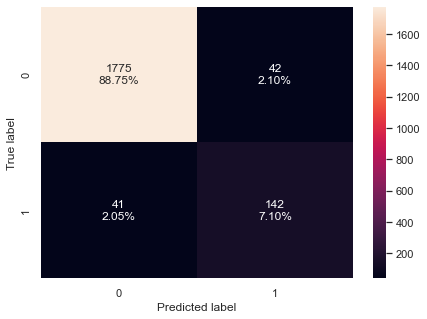

In [26]:
dt = DecisionTreeClassifier()
model_dt, dt_time = model_training(dt, X_train, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_dt,dt_pred_time = model_predicting(model_dt,X_test)

# lets evaluate the model
results_dt = modelEvaluation(model_dt, y_pred_dt,X_test, y_test)

### KNN Model

Training ...
Wall time: 34 ms
training time:  0.03497719764709473
 done.
Predicting ...
predicted time:  0.12195158004760742
done

ROC_AUC on validation set: 0.9419
KFold Cross Validation on validation set: 0.9772

Classification report : 
                   precision    recall  f1-score   support

not pulsar stars       0.98      1.00      0.99      1817
    pulsar stars       0.94      0.80      0.87       183

        accuracy                           0.98      2000
       macro avg       0.96      0.90      0.93      2000
    weighted avg       0.98      0.98      0.98      2000


Confusion Matrix : 
 [[1808    9]
 [  36  147]]


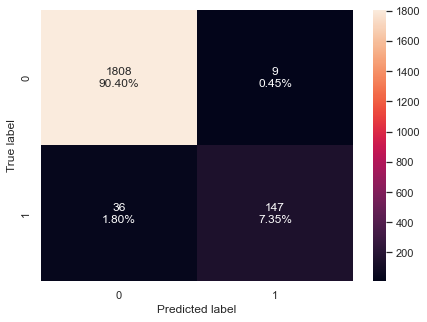

In [27]:
knn = KNeighborsClassifier()
model_knn, knn_time = model_training(knn, X_train, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_knn,knn_pred_time = model_predicting(model_knn,X_test)

# lets evaluate the model
results_knn = modelEvaluation(model_knn, y_pred_knn,X_test, y_test)

### SVM Model

##### Linear Kernel

Training ...
Wall time: 2.08 s
training time:  2.0858068466186523
 done.
Predicting ...
predicted time:  0.0439753532409668
done

ROC_AUC on validation set: 0.9623
KFold Cross Validation on validation set: 0.9762

Classification report : 
                   precision    recall  f1-score   support

not pulsar stars       0.98      1.00      0.99      1817
    pulsar stars       0.96      0.75      0.84       183

        accuracy                           0.97      2000
       macro avg       0.97      0.87      0.91      2000
    weighted avg       0.97      0.97      0.97      2000


Confusion Matrix : 
 [[1811    6]
 [  46  137]]


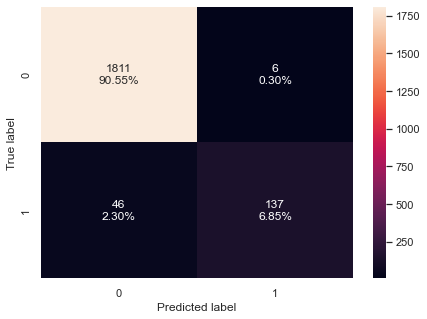

In [28]:
svc_linear = SVC(kernel='linear', probability=True)
model_svc_linear, svc_linear_time = model_training(svc_linear, X_train, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_svc_linear,svc_linear_pred_time = model_predicting(model_svc_linear,X_test)

# lets evaluate the model
results_svc_linear = modelEvaluation(model_svc_linear, y_pred_svc_linear,X_test, y_test)

##### RBF Kernel

Training ...
Wall time: 3.14 s
training time:  3.14520263671875
 done.
Predicting ...
predicted time:  0.16188526153564453
done

ROC_AUC on validation set: 0.9564
KFold Cross Validation on validation set: 0.9776

Classification report : 
                   precision    recall  f1-score   support

not pulsar stars       0.98      1.00      0.99      1817
    pulsar stars       0.96      0.76      0.85       183

        accuracy                           0.97      2000
       macro avg       0.97      0.88      0.92      2000
    weighted avg       0.97      0.97      0.97      2000


Confusion Matrix : 
 [[1811    6]
 [  44  139]]


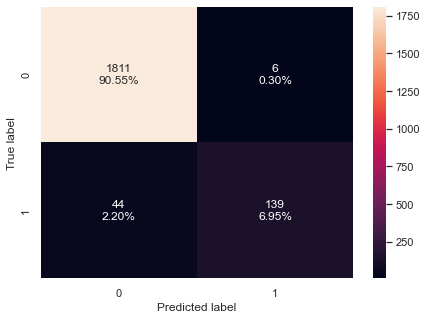

In [29]:
svc_rbf = SVC(kernel='rbf', probability=True)
model_svc_rbf, svc_rbf_time = model_training(svc_rbf, X_train, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_svc_rbf,svc_rbf_pred_time = model_predicting(model_svc_rbf,X_test)

# lets evaluate the model
results_svc_rbf = modelEvaluation(model_svc_rbf, y_pred_svc_rbf,X_test, y_test)

##### Poly Kernel

Training ...
Wall time: 3.03 s
training time:  3.035264492034912
 done.
Predicting ...
predicted time:  0.04497575759887695
done

ROC_AUC on validation set: 0.9348
KFold Cross Validation on validation set: 0.9747

Classification report : 
                   precision    recall  f1-score   support

not pulsar stars       0.97      1.00      0.98      1817
    pulsar stars       0.94      0.72      0.82       183

        accuracy                           0.97      2000
       macro avg       0.96      0.86      0.90      2000
    weighted avg       0.97      0.97      0.97      2000


Confusion Matrix : 
 [[1809    8]
 [  51  132]]


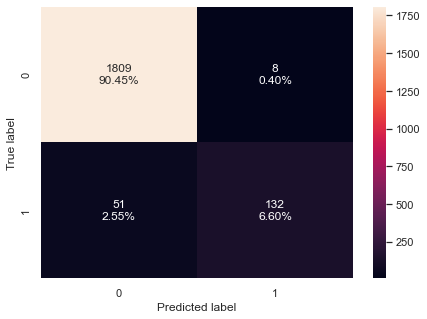

In [30]:
svc_poly = SVC(kernel='poly', probability=True)
model_svc_poly, svc_poly_time = model_training(svc_poly, X_train, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_svc_poly,svc_poly_pred_time = model_predicting(model_svc_poly,X_test)

# lets evaluate the model
results_svc_poly = modelEvaluation(model_svc_poly, y_pred_svc_poly,X_test, y_test)

##### Sigmoid Kernel

Training ...
Wall time: 5.35 s
training time:  5.349944114685059
 done.
Predicting ...
predicted time:  0.15590691566467285
done

ROC_AUC on validation set: 0.8666
KFold Cross Validation on validation set: 0.8722

Classification report : 
                   precision    recall  f1-score   support

not pulsar stars       0.93      0.92      0.93      1817
    pulsar stars       0.30      0.32      0.31       183

        accuracy                           0.87      2000
       macro avg       0.62      0.62      0.62      2000
    weighted avg       0.87      0.87      0.87      2000


Confusion Matrix : 
 [[1679  138]
 [ 124   59]]


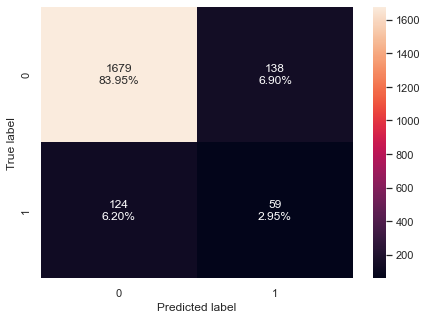

In [31]:
svc_sigmoid = SVC(kernel='sigmoid', probability=True)
model_svc_sigmoid, svc_sigmoid_time = model_training(svc_sigmoid, X_train, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_svc_sigmoid,svc_sigmoid_pred_time = model_predicting(model_svc_sigmoid,X_test)

# lets evaluate the model
results_svc_sigmoid = modelEvaluation(model_svc_sigmoid, y_pred_svc_sigmoid,X_test, y_test)

In [32]:
results_dt = results_dt + [dt_time, dt_pred_time]
results_knn = results_knn + [knn_time, knn_pred_time]
results_svc_linear = results_svc_linear + [svc_linear_time, svc_linear_pred_time]
results_svc_rbf = results_svc_rbf + [svc_rbf_time, svc_rbf_pred_time]
results_svc_poly = results_svc_poly + [svc_poly_time, svc_poly_pred_time]
results_svc_sigmoid = results_svc_sigmoid + [svc_sigmoid_time, svc_sigmoid_pred_time]

In [33]:
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score','AUC_ROC','KFold','trainingTime(s)', 'predTime(s)'],
    'DecisionTree' : results_dt,
    'KNN' : results_knn,
    'SVM(Linear)' : results_svc_linear,
    'SVM(RBF)' : results_svc_rbf,
    'SVM(POLY)' : results_svc_poly,
    'SVM(SIGMOID)' : results_svc_sigmoid,

}
metrics_df = pd.DataFrame(dic)

metrics_df = metrics_df.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df.T, headers = 'keys', tablefmt = 'psql'))

+--------------+------------+-------------+----------+------------+-----------+---------+-------------------+---------------+
|              |   accuracy |   precision |   recall |   f1-score |   AUC_ROC |   KFold |   trainingTime(s) |   predTime(s) |
|--------------+------------+-------------+----------+------------+-----------+---------+-------------------+---------------|
| DecisionTree |     0.9585 |    0.771739 | 0.775956 |   0.773842 |  0.876421 |  0.964  |         0.0999401 |    0.00100112 |
| KNN          |     0.9775 |    0.942308 | 0.803279 |   0.867257 |  0.94188  |  0.9772 |         0.0349772 |    0.121952   |
| SVM(Linear)  |     0.974  |    0.958042 | 0.748634 |   0.840491 |  0.96232  |  0.9762 |         2.08581   |    0.0439754  |
| SVM(RBF)     |     0.975  |    0.958621 | 0.759563 |   0.847561 |  0.95641  |  0.9776 |         3.1452    |    0.161885   |
| SVM(POLY)    |     0.9705 |    0.942857 | 0.721311 |   0.817337 |  0.93476  |  0.9747 |         3.03526   |    0.044

* From above analysis, we can see that SVM rbf and linear both are good f1-score, AUC_ROC score and KFold score.
* But we will choose the SVM linear because we can see that its traning and predicting time low as compare to RBF.

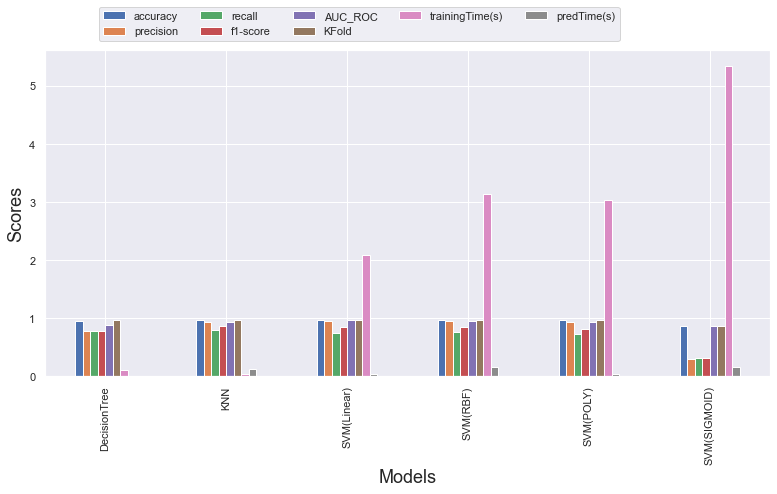

In [34]:
metrics_df.T.plot(kind='bar', figsize=(13,6))
plt.ylabel('Scores',fontsize=18)
plt.xlabel('Models',fontsize=18)
plt.legend(ncol=5, bbox_to_anchor=(0.8,1.15))
plt.show()

### Task 5

### Feature selection Filter Method :: Correlation

In [35]:
imp = df.drop("target", axis=1).apply(lambda x: x.corr(df.target))
indices = np.argsort(imp)
print(imp[indices]) # Sorted in ascending order

mean_profile       -0.674869
kurtosis_dmsnr     -0.390280
std_profile        -0.367005
skewness_dmsnr     -0.253701
mean_dmsnr          0.400296
std_dmsnr           0.473369
skewness_profile    0.707409
kurtosis_profile    0.740970
dtype: float64


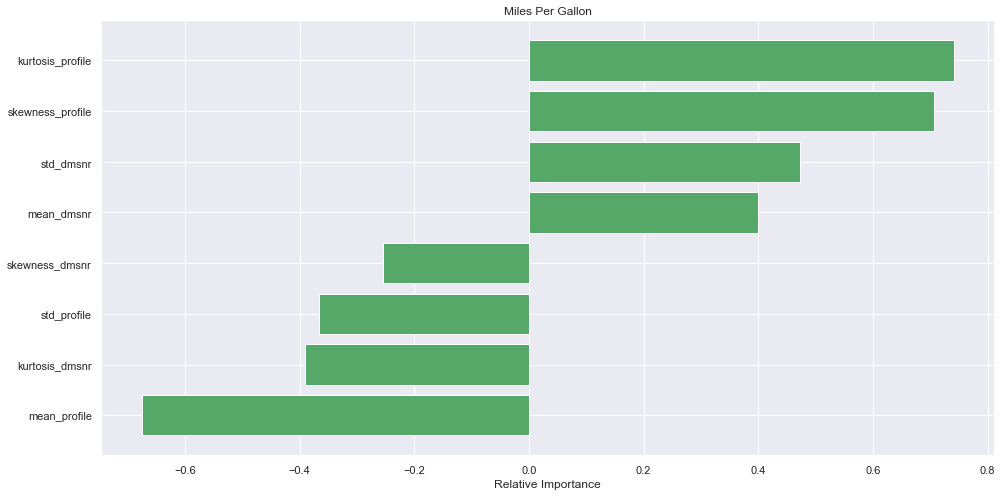

In [36]:
import matplotlib.pyplot as plt

names=df.columns[:-1]
plt.title('Miles Per Gallon')

#Plotting horizontal bar graph
plt.barh(range(len(indices)), imp[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* From above we can see that most discriminative features are `kurtosis_profile`, `mean_profile` and `skewness_profile`.
* And least discriminative features are `kurtosis_dmsnr`, `std_profile` and `skewness_dmsnr`

In [37]:
X_train = pd.DataFrame(X_train, columns=df.columns[:-1])
X_test = pd.DataFrame(X_test, columns=df.columns[:-1])

X_train_filter = X_train[['kurtosis_profile','mean_profile','skewness_profile','kurtosis_dmsnr','std_profile', 'skewness_dmsnr']]
X_test_filter = X_test[['kurtosis_profile','mean_profile','skewness_profile','kurtosis_dmsnr','std_profile', 'skewness_dmsnr']]

In [38]:
X_train_filter.head()

,kurtosis_profile,mean_profile,skewness_profile,kurtosis_dmsnr,std_profile,skewness_dmsnr
0,-0.497295,0.679837,-0.394244,0.139265,1.251264,-0.098201
1,0.198481,-1.133660,-0.002590,0.406776,-0.769882,0.331683
2,-0.298406,-0.424828,-0.317593,2.025711,0.204030,2.747269
3,-0.353561,0.041307,-0.232718,1.315913,0.284871,1.339531
4,-0.368892,-0.177242,-0.166965,-0.555814,-0.485252,-0.690518


### Linear

Training ...
Wall time: 1.83 s
training time:  1.8339502811431885
 done.
Predicting ...
predicted time:  0.0419919490814209
done

ROC_AUC on validation set: 0.9609
KFold Cross Validation on validation set: 0.9762

Classification report : 
                   precision    recall  f1-score   support

not pulsar stars       0.97      1.00      0.99      1817
    pulsar stars       0.96      0.74      0.84       183

        accuracy                           0.97      2000
       macro avg       0.97      0.87      0.91      2000
    weighted avg       0.97      0.97      0.97      2000


Confusion Matrix : 
 [[1811    6]
 [  47  136]]


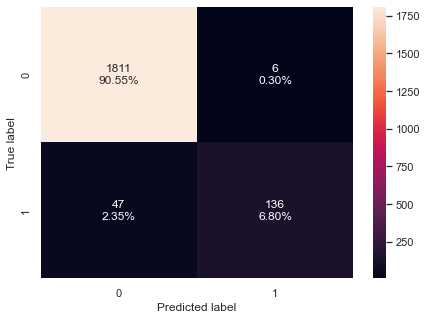

In [39]:
svc_linear = SVC(kernel='linear', probability=True)
model_svc_linear_, svc_linear_time = model_training(svc_linear, X_train_filter, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_svc_linear,svc_linear_pred_time = model_predicting(model_svc_linear_,X_test_filter)

# lets evaluate the model
results_svc_linear = modelEvaluation(model_svc_linear_, y_pred_svc_linear, X_test_filter,y_test)

### RBF

Training ...
Wall time: 3 s
training time:  3.0012826919555664
 done.
Predicting ...
predicted time:  0.15191364288330078
done

ROC_AUC on validation set: 0.9453
KFold Cross Validation on validation set: 0.9776

Classification report : 
                   precision    recall  f1-score   support

not pulsar stars       0.98      1.00      0.99      1817
    pulsar stars       0.95      0.78      0.85       183

        accuracy                           0.98      2000
       macro avg       0.96      0.89      0.92      2000
    weighted avg       0.97      0.98      0.97      2000


Confusion Matrix : 
 [[1809    8]
 [  41  142]]


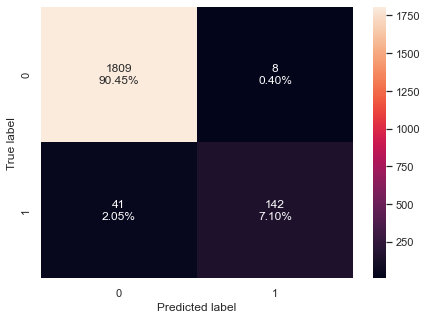

In [40]:
svc_rbf = SVC(kernel='rbf', probability=True)
model_svc_rbf_, svc_rbf_time = model_training(svc_rbf, X_train_filter, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_svc_rbf,svc_rbf_pred_time = model_predicting(model_svc_rbf_,X_test_filter)

# lets evaluate the model
results_svc_rbf = modelEvaluation(model_svc_rbf_, y_pred_svc_rbf,X_test_filter, y_test)

### POLY

Training ...
Wall time: 2.38 s
training time:  2.3776443004608154
 done.
Predicting ...
predicted time:  0.04698610305786133
done

ROC_AUC on validation set: 0.9547
KFold Cross Validation on validation set: 0.9747

Classification report : 
                   precision    recall  f1-score   support

not pulsar stars       0.97      1.00      0.98      1817
    pulsar stars       0.95      0.72      0.82       183

        accuracy                           0.97      2000
       macro avg       0.96      0.86      0.90      2000
    weighted avg       0.97      0.97      0.97      2000


Confusion Matrix : 
 [[1810    7]
 [  51  132]]


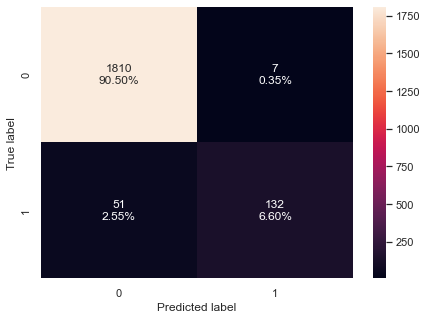

In [41]:
svc_poly = SVC(kernel='poly', probability=True)
model_svc_poly_, svc_poly_time = model_training(svc_poly, X_train_filter, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_svc_poly,svc_poly_pred_time = model_predicting(model_svc_poly_,X_test_filter)

# lets evaluate the model
results_svc_poly = modelEvaluation(model_svc_poly_, y_pred_svc_poly,X_test_filter, y_test)

### SIGMOID

Training ...
Wall time: 5.2 s
training time:  5.196030378341675
 done.
Predicting ...
predicted time:  0.21587753295898438
done

ROC_AUC on validation set: 0.8809
KFold Cross Validation on validation set: 0.8722

Classification report : 
                   precision    recall  f1-score   support

not pulsar stars       0.94      0.92      0.93      1817
    pulsar stars       0.31      0.37      0.34       183

        accuracy                           0.87      2000
       macro avg       0.62      0.64      0.63      2000
    weighted avg       0.88      0.87      0.87      2000


Confusion Matrix : 
 [[1666  151]
 [ 115   68]]


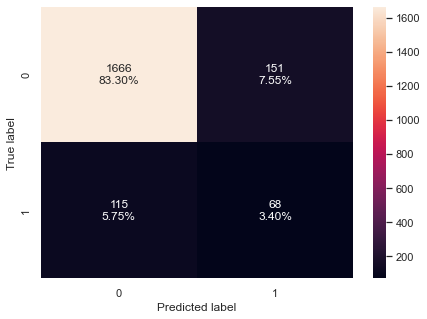

In [42]:
svc_sigmoid = SVC(kernel='sigmoid', probability=True)
model_svc_sigmoid_, svc_sigmoid_time = model_training(svc_sigmoid, X_train_filter, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_svc_sigmoid,svc_sigmoid_pred_time = model_predicting(model_svc_sigmoid_,X_test_filter)

# lets evaluate the model
results_svc_sigmoid = modelEvaluation(model_svc_sigmoid_, y_pred_svc_sigmoid,X_test_filter, y_test)

In [43]:
results_svc_linear = results_svc_linear + [svc_linear_time, svc_linear_pred_time]
results_svc_rbf = results_svc_rbf + [svc_rbf_time, svc_rbf_pred_time]
results_svc_poly = results_svc_poly + [svc_poly_time, svc_poly_pred_time]
results_svc_sigmoid = results_svc_sigmoid + [svc_sigmoid_time, svc_sigmoid_pred_time]

In [44]:
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score','AUC_ROC','KFold','trainingTime(s)', 'predTime(s)'],
    'SVM(Linear)' : results_svc_linear,
    'SVM(RBF)' : results_svc_rbf,
    'SVM(POLY)' : results_svc_poly,
    'SVM(SIGMOID)' : results_svc_sigmoid,

}
metrics_df_filter = pd.DataFrame(dic)

metrics_df_filter = metrics_df_filter.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df_filter.T, headers = 'keys', tablefmt = 'psql'))

+--------------+------------+-------------+----------+------------+-----------+---------+-------------------+---------------+
|              |   accuracy |   precision |   recall |   f1-score |   AUC_ROC |   KFold |   trainingTime(s) |   predTime(s) |
|--------------+------------+-------------+----------+------------+-----------+---------+-------------------+---------------|
| SVM(Linear)  |     0.9735 |    0.957746 | 0.743169 |   0.836923 |  0.960855 |  0.9762 |           1.83395 |     0.0419919 |
| SVM(RBF)     |     0.9755 |    0.946667 | 0.775956 |   0.852853 |  0.945322 |  0.9776 |           3.00128 |     0.151914  |
| SVM(POLY)    |     0.971  |    0.94964  | 0.721311 |   0.819876 |  0.954717 |  0.9747 |           2.37764 |     0.0469861 |
| SVM(SIGMOID) |     0.867  |    0.310502 | 0.371585 |   0.338308 |  0.880941 |  0.8722 |           5.19603 |     0.215878  |
+--------------+------------+-------------+----------+------------+-----------+---------+-------------------+---------

### Task 6

### Feature selection Wrapper Method :: backward elimination

In [45]:
# sklearn library contains built-in implementation for most of the wrapper methods based feature selection techniques. 
# SequentialFeatureSelector() function comes with various combinations of feature selection techniques.
from sklearn.feature_selection import SequentialFeatureSelector as SFS

In [46]:
def get_feature_backward_elimination(model, n_features_to_select = 5):
    # Sequential backward selection (sbs)
    sfs_backward = SFS(
        model, n_features_to_select=n_features_to_select, direction="backward"
    )
    sfs_backward.fit(X_train, y_train)
    feature_names = np.array(df.columns[:-1].tolist())
    selected_features = feature_names[sfs_backward.get_support()]
    print(
        "Features selected by backward sequential selection: \n"
        f"{selected_features}"
    )
    return selected_features

In [47]:
def get_X_train_X_test_with_selected_features(selected_features):
    X_train_wrapper = X_train[selected_features]
    X_test_wrapper = X_test[selected_features]
    return X_train_wrapper, X_test_wrapper

In [48]:
# for Decision Tree
selected_features_dt = get_feature_backward_elimination(DecisionTreeClassifier(), n_features_to_select=5)
X_train_wrapper_dt, X_test_wrapper_dt = get_X_train_X_test_with_selected_features(selected_features_dt)

Features selected by backward sequential selection: 
['mean_profile' 'kurtosis_profile' 'skewness_profile' 'std_dmsnr'
 'skewness_dmsnr']


In [49]:
# for KNN
selected_features_knn = get_feature_backward_elimination(KNeighborsClassifier(), n_features_to_select=5)
X_train_wrapper_knn, X_test_wrapper_knn = get_X_train_X_test_with_selected_features(selected_features_knn)

Features selected by backward sequential selection: 
['mean_profile' 'kurtosis_profile' 'skewness_profile' 'mean_dmsnr'
 'skewness_dmsnr']


In [50]:
# for SVM with kernel linear
selected_features_svc_lin = get_feature_backward_elimination(SVC(kernel='linear'), n_features_to_select=5)
X_train_wrapper_svc_lin, X_test_wrapper_svc_lin = get_X_train_X_test_with_selected_features(selected_features_svc_lin)

Features selected by backward sequential selection: 
['std_profile' 'kurtosis_profile' 'skewness_profile' 'mean_dmsnr'
 'std_dmsnr']


In [51]:
# for SVM with kernel RBF
selected_features_svc_rbf = get_feature_backward_elimination(SVC(kernel='rbf'), n_features_to_select=5)
X_train_wrapper_svc_rbf, X_test_wrapper_svc_rbf = get_X_train_X_test_with_selected_features(selected_features_svc_rbf)

Features selected by backward sequential selection: 
['std_profile' 'kurtosis_profile' 'skewness_profile' 'mean_dmsnr'
 'std_dmsnr']


In [52]:
# for SVM with kernel Poly
selected_features_svc_poly = get_feature_backward_elimination(SVC(kernel='poly'), n_features_to_select=5)
X_train_wrapper_svc_poly, X_test_wrapper_svc_poly = get_X_train_X_test_with_selected_features(selected_features_svc_poly)

Features selected by backward sequential selection: 
['kurtosis_profile' 'skewness_profile' 'mean_dmsnr' 'std_dmsnr'
 'skewness_dmsnr']


In [53]:
# for SVM with kernel sigmoid
selected_features_svc_sig = get_feature_backward_elimination(SVC(kernel='sigmoid'), n_features_to_select=5)
X_train_wrapper_svc_sig, X_test_wrapper_svc_sig = get_X_train_X_test_with_selected_features(selected_features_svc_sig)

Features selected by backward sequential selection: 
['kurtosis_profile' 'skewness_profile' 'mean_dmsnr' 'kurtosis_dmsnr'
 'skewness_dmsnr']


### Models

Training ...
Wall time: 94.9 ms
training time:  0.09594249725341797
 done.
Predicting ...
predicted time:  0.0019965171813964844
done

ROC_AUC on validation set: 0.8879
KFold Cross Validation on validation set: 0.9647

Classification report : 
                   precision    recall  f1-score   support

not pulsar stars       0.98      0.98      0.98      1817
    pulsar stars       0.78      0.80      0.79       183

        accuracy                           0.96      2000
       macro avg       0.88      0.89      0.89      2000
    weighted avg       0.96      0.96      0.96      2000


Confusion Matrix : 
 [[1777   40]
 [  37  146]]


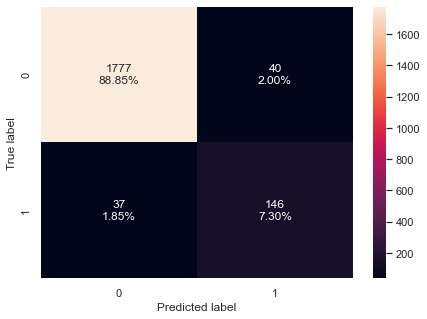

In [54]:
dt = DecisionTreeClassifier()
model_dt_, dt_time = model_training(dt, X_train_wrapper_dt, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_dt,dt_pred_time = model_predicting(model_dt_,X_test_wrapper_dt)

# lets evaluate the model
results_dt = modelEvaluation(model_dt_, y_pred_dt,X_test_wrapper_dt, y_test)

Training ...
Wall time: 36 ms
training time:  0.03697991371154785
 done.
Predicting ...
predicted time:  0.2078845500946045
done

ROC_AUC on validation set: 0.9452
KFold Cross Validation on validation set: 0.9772

Classification report : 
                   precision    recall  f1-score   support

not pulsar stars       0.98      0.99      0.99      1817
    pulsar stars       0.93      0.77      0.84       183

        accuracy                           0.97      2000
       macro avg       0.95      0.88      0.91      2000
    weighted avg       0.97      0.97      0.97      2000


Confusion Matrix : 
 [[1806   11]
 [  42  141]]


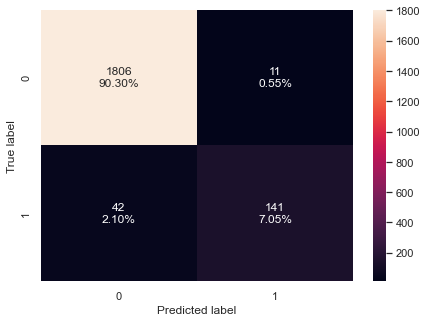

In [55]:
knn = KNeighborsClassifier()
model_knn_, knn_time = model_training(knn, X_train_wrapper_knn, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_knn,knn_pred_time = model_predicting(model_knn_,X_test_wrapper_knn)

# lets evaluate the model
results_knn = modelEvaluation(model_knn_, y_pred_knn,X_test_wrapper_knn, y_test)

Training ...
Wall time: 1.95 s
training time:  1.9489035606384277
 done.
Predicting ...
predicted time:  0.04795575141906738
done

ROC_AUC on validation set: 0.9610
KFold Cross Validation on validation set: 0.9762

Classification report : 
                   precision    recall  f1-score   support

not pulsar stars       0.98      1.00      0.99      1817
    pulsar stars       0.96      0.75      0.84       183

        accuracy                           0.97      2000
       macro avg       0.97      0.87      0.91      2000
    weighted avg       0.97      0.97      0.97      2000


Confusion Matrix : 
 [[1812    5]
 [  46  137]]


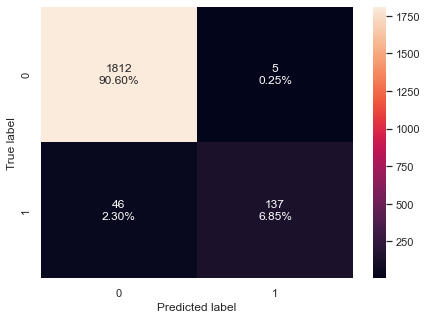

In [56]:
svc_linear = SVC(kernel='linear', probability=True)
model_svc_linear_, svc_linear_time = model_training(svc_linear, X_train_wrapper_svc_lin, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_svc_linear,svc_linear_pred_time = model_predicting(model_svc_linear_,X_test_wrapper_svc_lin)

# lets evaluate the model
results_svc_linear = modelEvaluation(model_svc_linear_, y_pred_svc_linear,X_test_wrapper_svc_lin, y_test)

Training ...
Wall time: 6.77 s
training time:  6.767136573791504
 done.
Predicting ...
predicted time:  0.2668440341949463
done

ROC_AUC on validation set: 0.9533
KFold Cross Validation on validation set: 0.9776

Classification report : 
                   precision    recall  f1-score   support

not pulsar stars       0.98      1.00      0.99      1817
    pulsar stars       0.96      0.77      0.85       183

        accuracy                           0.98      2000
       macro avg       0.97      0.88      0.92      2000
    weighted avg       0.98      0.98      0.97      2000


Confusion Matrix : 
 [[1811    6]
 [  43  140]]


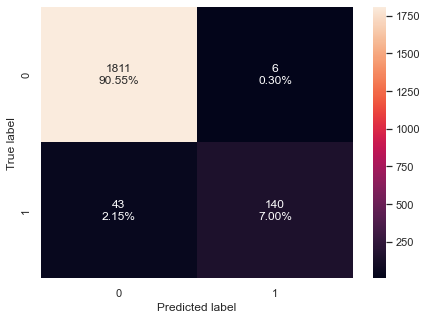

In [57]:
svc_rbf = SVC(kernel='rbf', probability=True)
model_svc_rbf_, svc_rbf_time = model_training(svc_rbf, X_train_wrapper_svc_rbf, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_svc_rbf,svc_rbf_pred_time = model_predicting(model_svc_rbf_,X_test_wrapper_svc_rbf)

# lets evaluate the model
results_svc_rbf = modelEvaluation(model_svc_rbf_, y_pred_svc_rbf,X_test_wrapper_svc_rbf, y_test)

Training ...
Wall time: 3.95 s
training time:  3.9557385444641113
 done.
Predicting ...
predicted time:  0.06196403503417969
done

ROC_AUC on validation set: 0.9119
KFold Cross Validation on validation set: 0.9747

Classification report : 
                   precision    recall  f1-score   support

not pulsar stars       0.97      1.00      0.98      1817
    pulsar stars       0.96      0.70      0.81       183

        accuracy                           0.97      2000
       macro avg       0.96      0.85      0.90      2000
    weighted avg       0.97      0.97      0.97      2000


Confusion Matrix : 
 [[1811    6]
 [  54  129]]


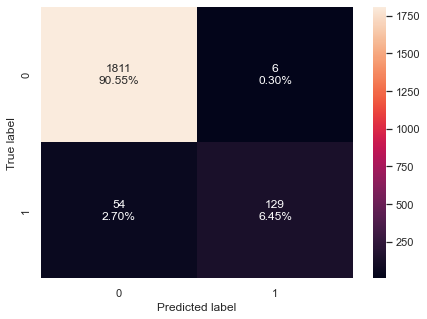

In [58]:
svc_poly = SVC(kernel='poly', probability=True)
model_svc_poly_, svc_poly_time = model_training(svc_poly, X_train_wrapper_svc_poly, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_svc_poly,svc_poly_pred_time = model_predicting(model_svc_poly_,X_test_wrapper_svc_poly)

# lets evaluate the model
results_svc_poly = modelEvaluation(model_svc_poly_, y_pred_svc_poly,X_test_wrapper_svc_poly, y_test)

Training ...
Wall time: 5.24 s
training time:  5.2380218505859375
 done.
Predicting ...
predicted time:  0.14793658256530762
done

ROC_AUC on validation set: 0.9169
KFold Cross Validation on validation set: 0.8722

Classification report : 
                   precision    recall  f1-score   support

not pulsar stars       0.95      0.94      0.95      1817
    pulsar stars       0.47      0.51      0.49       183

        accuracy                           0.90      2000
       macro avg       0.71      0.73      0.72      2000
    weighted avg       0.91      0.90      0.90      2000


Confusion Matrix : 
 [[1712  105]
 [  90   93]]


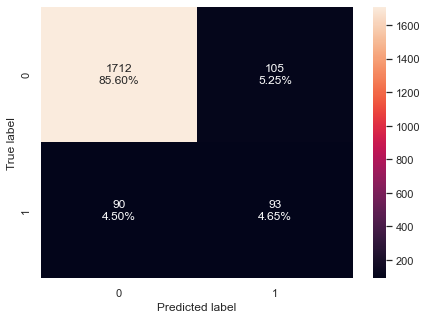

In [59]:
svc_sigmoid = SVC(kernel='sigmoid', probability=True)
model_svc_sigmoid_, svc_sigmoid_time = model_training(svc_sigmoid, X_train_wrapper_svc_sig, y_train)

# model_predicting function will return the prediction and prediction time
y_pred_svc_sigmoid,svc_sigmoid_pred_time = model_predicting(model_svc_sigmoid_,X_test_wrapper_svc_sig)

# lets evaluate the model
results_svc_sigmoid = modelEvaluation(model_svc_sigmoid_, y_pred_svc_sigmoid,X_test_wrapper_svc_sig, y_test)

In [60]:
results_dt = results_dt + [dt_time, dt_pred_time]
results_knn = results_knn + [knn_time, knn_pred_time]
results_svc_linear = results_svc_linear + [svc_linear_time, svc_linear_pred_time]
results_svc_rbf = results_svc_rbf + [svc_rbf_time, svc_rbf_pred_time]
results_svc_poly = results_svc_poly + [svc_poly_time, svc_poly_pred_time]
results_svc_sigmoid = results_svc_sigmoid + [svc_sigmoid_time, svc_sigmoid_pred_time]

In [61]:
# showing all models result
dic = {
    'Metrics':['accuracy','precision','recall','f1-score','AUC_ROC','KFold','trainingTime(s)', 'predTime(s)'],
    'DecisionTree' : results_dt,
    'KNN' : results_knn,
    'SVM(Linear)' : results_svc_linear,
    'SVM(RBF)' : results_svc_rbf,
    'SVM(POLY)' : results_svc_poly,
    'SVM(SIGMOID)' : results_svc_sigmoid,

}
metrics_df_wrapper = pd.DataFrame(dic)

metrics_df_wrapper = metrics_df_wrapper.set_index('Metrics')
# displaying the DataFrame
print(tabulate(metrics_df_wrapper.T, headers = 'keys', tablefmt = 'psql'))

+--------------+------------+-------------+----------+------------+-----------+---------+-------------------+---------------+
|              |   accuracy |   precision |   recall |   f1-score |   AUC_ROC |   KFold |   trainingTime(s) |   predTime(s) |
|--------------+------------+-------------+----------+------------+-----------+---------+-------------------+---------------|
| DecisionTree |     0.9615 |    0.784946 | 0.797814 |   0.791328 |  0.8879   |  0.9647 |         0.0959425 |    0.00199652 |
| KNN          |     0.9735 |    0.927632 | 0.770492 |   0.841791 |  0.945194 |  0.9772 |         0.0369799 |    0.207885   |
| SVM(Linear)  |     0.9745 |    0.964789 | 0.748634 |   0.843077 |  0.961024 |  0.9762 |         1.9489    |    0.0479558  |
| SVM(RBF)     |     0.9755 |    0.958904 | 0.765027 |   0.851064 |  0.953286 |  0.9776 |         6.76714   |    0.266844   |
| SVM(POLY)    |     0.97   |    0.955556 | 0.704918 |   0.811321 |  0.911913 |  0.9747 |         3.95574   |    0.061

* For Filter method, we choose theese feature `['kurtosis_profile','mean_profile','skewness_profile','kurtosis_dmsnr','std_profile', 'skewness_dmsnr']` throug correlation with three most discrimentive and three least discriminative.  
* For Wrapper method, we apply the backward elimination feature selection technique for each classifiers and get the best 5 features subset.

* WRAPPER BACKWARD ELIMINATION METHOD
    * For Decision Tree we get these 5 features from wrapper backward method `['mean_profile' 'kurtosis_profile' 'skewness_profile' 'mean_dmsnr' 'std_dmsnr']`
    * KNN selected features `['mean_profile' 'kurtosis_profile' 'skewness_profile' 'mean_dmsnr'
 'skewness_dmsnr']`
    * SVM
        * Linear selected features `['std_profile' 'kurtosis_profile' 'skewness_profile' 'mean_dmsnr'
 'std_dmsnr']`
        * RBF selected features `['std_profile' 'kurtosis_profile' 'skewness_profile' 'mean_dmsnr'
 'std_dmsnr']`
        * Poly selected features `['kurtosis_profile' 'skewness_profile' 'mean_dmsnr' 'std_dmsnr'
 'skewness_dmsnr']`
        * Sigmoid selected features `['kurtosis_profile' 'skewness_profile' 'mean_dmsnr' 'kurtosis_dmsnr'
 'skewness_dmsnr']`

### Task 7

In [62]:
print("Full Features Models Results")
print(tabulate(metrics_df.T, headers = 'keys', tablefmt = 'psql'))
print()
print("Filter Method Models Results")
print(tabulate(metrics_df_filter.T, headers = 'keys', tablefmt = 'psql'))
print()
print("Wrapper Method Models Results")
print(tabulate(metrics_df_wrapper.T, headers = 'keys', tablefmt = 'psql'))
print()

Full Features Models Results
+--------------+------------+-------------+----------+------------+-----------+---------+-------------------+---------------+
|              |   accuracy |   precision |   recall |   f1-score |   AUC_ROC |   KFold |   trainingTime(s) |   predTime(s) |
|--------------+------------+-------------+----------+------------+-----------+---------+-------------------+---------------|
| DecisionTree |     0.9585 |    0.771739 | 0.775956 |   0.773842 |  0.876421 |  0.964  |         0.0999401 |    0.00100112 |
| KNN          |     0.9775 |    0.942308 | 0.803279 |   0.867257 |  0.94188  |  0.9772 |         0.0349772 |    0.121952   |
| SVM(Linear)  |     0.974  |    0.958042 | 0.748634 |   0.840491 |  0.96232  |  0.9762 |         2.08581   |    0.0439754  |
| SVM(RBF)     |     0.975  |    0.958621 | 0.759563 |   0.847561 |  0.95641  |  0.9776 |         3.1452    |    0.161885   |
| SVM(POLY)    |     0.9705 |    0.942857 | 0.721311 |   0.817337 |  0.93476  |  0.9747 |

* From above anaylsis, we can see the results on each scenerio.
* From these results, we observe models giving not enough score on others feature selection method as compare to original dataset.
* Therefore, we will go with full features.

### Task 8

### ROC Curves

In [63]:
def get_fpr_tpr_auc_roc_score(model):
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    return fpr,tpr, auc

In [64]:
model_svc_linear_

SVC(kernel='linear', probability=True)

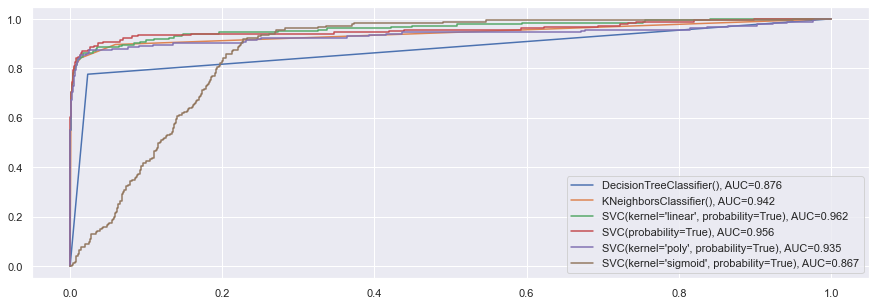

In [66]:
plt.figure(figsize=(15,5))
fpr1,tpr1,auc1 = get_fpr_tpr_auc_roc_score(model_dt)
fpr2,tpr2,auc2 = get_fpr_tpr_auc_roc_score(model_knn)
fpr3,tpr3,auc3 = get_fpr_tpr_auc_roc_score(model_svc_linear)
fpr4,tpr4,auc4 = get_fpr_tpr_auc_roc_score(model_svc_rbf)
fpr5,tpr5,auc5 = get_fpr_tpr_auc_roc_score(model_svc_poly)
fpr6,tpr6,auc6 = get_fpr_tpr_auc_roc_score(model_svc_sigmoid)

plt.plot(fpr1,tpr1,label=f"{model_dt}, AUC="+str(round(auc1,3)))
plt.plot(fpr2,tpr2,label=f"{model_knn}, AUC="+str(round(auc2,3)))
plt.plot(fpr3,tpr3,label=f"{model_svc_linear}, AUC="+str(round(auc3,3)))
plt.plot(fpr4,tpr4,label=f"{model_svc_rbf}, AUC="+str(round(auc4,3)))
plt.plot(fpr5,tpr5,label=f"{model_svc_poly}, AUC="+str(round(auc5,3)))
plt.plot(fpr6,tpr6,label=f"{model_svc_sigmoid}, AUC="+str(round(auc6,3)))


plt.legend(loc=4)
plt.show()

* From above analysis, we can see the roc curve for each classifiers.
* SVM with linear and RBF are giving better curve as compare to others.
* In a ROC curve, a higher X-axis value indicates a higher number of False positives than True negatives. While a higher Y-axis value indicates a higher number of True positives than False negatives. So, the choice of the threshold depends on the ability to balance between False positives and False negatives.
* We are satisfied the SVM linear and RBF, the closer an ROC curve is to the upper left corner, the more efficient is the test.

### Task 9

1) **Correlation of the various features with the target class**
    * We have already check the correlation of features with target class above.
    * A positive correlation means that the variables move in the same direction. Put another way, it means that as one variable increases so does the other, and conversely, when one variable decreases so does the other. A negative correlation means that the variables move in opposite directions.
    
2) **feature selection and feature importance**

    * feature selection
        * It is a process of automatically or manually selecting the subset of most appropriate and relevant features to be used in model building.
        * Feature selection algorithms are separated into three categories
            * (i)	The filters which extract features from the data without any learning involved.
            * (ii)	The wrappers that use learning techniques to evaluate which features are useful.
            * (iii)	The embedded techniques which combine the feature selection step and the classifier construction.
            
    * feature importance
        * Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable
        * Feature importance gives us better interpretability of data.
        * Other measures of feature importance
            * Aggregate methods
            * Permutation-based methods
            * Coefficients
            
3) **relative performance of different classifiers (different kernels in case of SVM) and different parameter settings w.r.t different evaluation measures**

        * We check the SVM model on different kernel in which model giving better on linear and RBF kernel. 
        but not performed well on sigmoid and poly. SVM perform worst on sigmoid kernel.
        * SVM with linear and RBF kernel giving better performance precision, recall, f1-score etc , we can see above in comparison table.
        
4) **effect of different ways of imputing missing values on the final performance of different classifiers.**
        
        * We already checked in dataset , null values was exist in dataset. 
        * Our all featrues is in numeric format, therefore, we fill the missing values with mean/average.
        * if missing values feature data types categorical then we fill with most frquent values.